# Fast.ai Deep Learning Lesson 1: Cats vs Dogs

[Link](https://course.fast.ai/lessons/lesson1.html)

Note that in order to follow the video tutorial, you need to pip install version 0.7.0 of fastai. The latest version will not work with the tutorial methodology. 

In [1]:
# fast ai installations
!pip install fastai==0.7.0
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 122kB 4.6MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
    100% |████████████████████████████████| 3.6MB 10.0MB/s 
    100% |████████████████████████████████| 1.5MB 9.7MB/s 
    100% |████████████████████████████████| 184kB 28.4MB/s 
    100% |████████████████████████████████| 496.4MB 37kB/s 
    100% |████████████████████████████████| 61kB 20.9MB/s 
    100% |████████████████████████████████| 11.6MB 3.2MB/s 
    100% |████████████████████████████████| 61kB 20.7MB/s 
    100% |████████████████████████████████| 92kB 26.7MB/s 
    100% |████████████████████████████████| 81kB 25.5MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
# suppress scientific notation, round to 4 decimals
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.4f}'.format})

# Download Images

In [4]:
!wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

--2018-12-15 20:52:08--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  97.2MB/s    in 8.5s    

2018-12-15 20:52:17 (95.7 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.j

# View Image Files

In [5]:
# bash command for our download folder
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
PATH = "data/dogscats/"
sz=224

In [7]:
!ls {PATH}

models	sample	test1  train  valid


In [8]:
!ls {PATH}valid

cats  dogs


In [9]:
# show first 10 file names
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

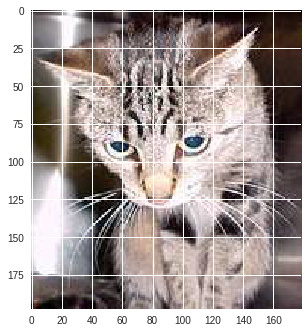

In [12]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [13]:
img.shape

(198, 179, 3)

In [14]:
img[:4,:4]

array([[[ 29,  20,  23],
        [ 31,  22,  25],
        [ 34,  25,  28],
        [ 37,  28,  31]],

       [[ 60,  51,  54],
        [ 58,  49,  52],
        [ 56,  47,  50],
        [ 55,  46,  49]],

       [[ 93,  84,  87],
        [ 89,  80,  83],
        [ 85,  76,  79],
        [ 81,  72,  75]],

       [[104,  95,  98],
        [103,  94,  97],
        [102,  93,  96],
        [102,  93,  96]]], dtype=uint8)

# Building First Model

In [0]:
!rm -rf {PATH}tmp

In [16]:
# train model using resnet34
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 16380421.61it/s]


100%|██████████| 32/32 [00:15<00:00,  4.24it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.05072    0.025019   0.9915    
    1      0.03493    0.023684   0.99      
    2      0.042501   0.025127   0.9895    



[array([0.02513]), 0.9895]

# Analyzing Results

In [18]:
# 0 = cats, 1 = dogs
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
data.classes

['cats', 'dogs']

In [20]:
# prediction for validation set in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [21]:
# first 10 predictions
log_preds[:10]

array([[ -0.00007,  -9.63727],
       [ -0.00062,  -7.38767],
       [ -0.00042,  -7.77569],
       [ -0.00001, -11.80169],
       [ -0.01398,  -4.27699],
       [ -0.03521,  -3.36387],
       [ -0.00004, -10.1806 ],
       [ -0.00019,  -8.56236],
       [ -0.     , -12.77306],
       [ -0.00001, -11.43438]], dtype=float32)

In [0]:
# since our probabilities are in log, we need to convert
preds = np.argmax(log_preds, axis=1) # from log probabilities to 0 or 1

# probabilities; suppress scientific notation with rounding function
probs = np.around(np.exp(log_preds[:,1]), decimals=4)

In [0]:
def rand_by_mask(mask): 
  return np.random.choice(np.where(mask)[0], 8, replace=False)

In [0]:
def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds_denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [0]:
def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds,x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

correctly classified


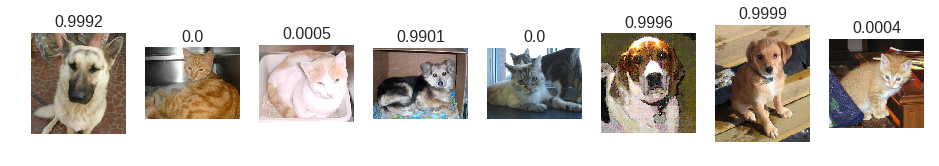

In [54]:
# a few correct labels at random
plot_val_with_title(rand_by_correct(True), "correctly classified")

Incorrectly Classified


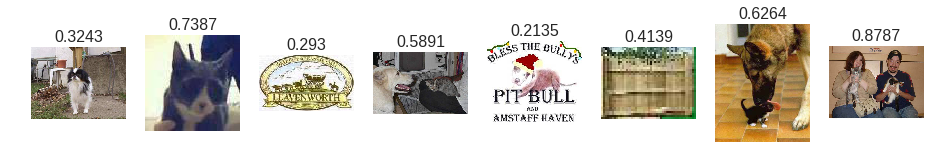

In [55]:
# incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly Classified")

In [0]:
def most_by_mask(mask, mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult * probs[idxs])[:5]]

In [0]:
def most_by_correct(y, is_correct):
  mult = -1 if (y==1)==is_correct else 1
  return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct cats


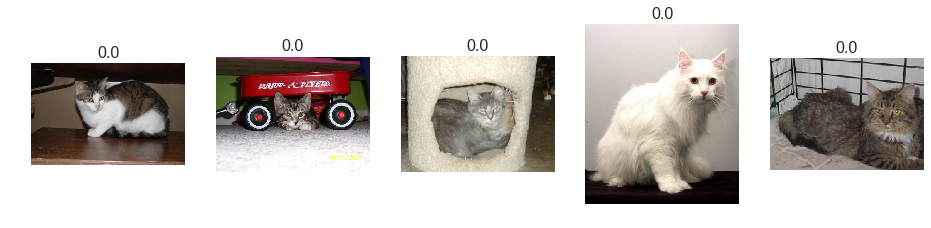

In [69]:
# show images that we are most confident are cats
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


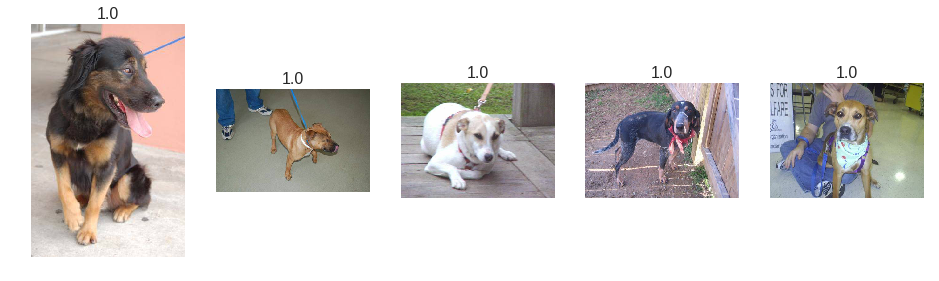

In [70]:
# most confident dog predictions
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


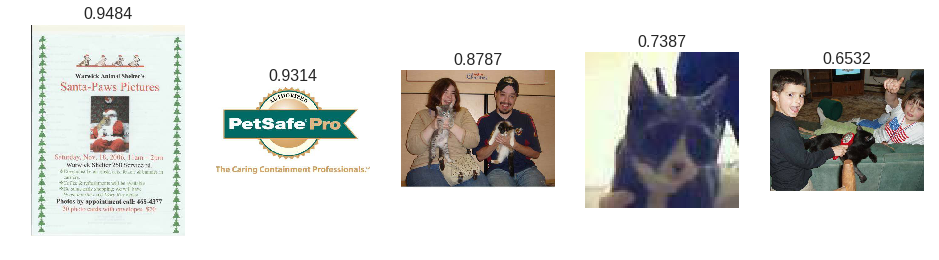

In [71]:
# which cats is the model "most confident" are "dogs"
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


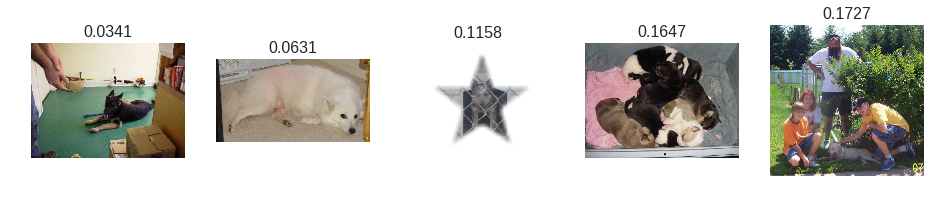

In [72]:
# most incorrectly classified dogs
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


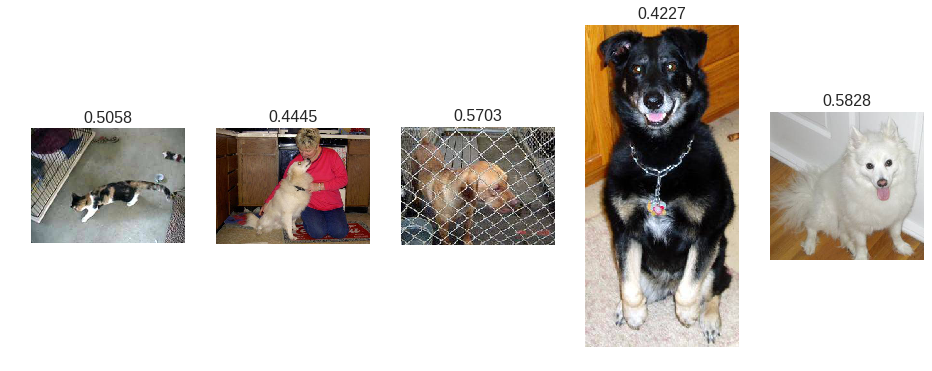

In [73]:
# most uncertain
most_uncertain = np.argsort(np.abs(probs -0.5))[:5]

plot_val_with_title(most_uncertain, "Most uncertain predictions")